In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

### Load the Dataset

In [5]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

train_dataset=datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

test_dataset=datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 9.91M/9.91M [00:07<00:00, 1.26MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 104kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 776kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.47MB/s]


In [7]:
len(train_dataset)

60000

In [9]:
len(test_dataset)

10000

In [11]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=True)

data_iter=iter(train_loader)
images,labels=next(data_iter)

In [13]:
images.shape

torch.Size([64, 1, 28, 28])

In [15]:
labels.shape

torch.Size([64])

In [18]:
images[0].shape

torch.Size([1, 28, 28])

In [19]:
images[0].squeeze().shape

torch.Size([28, 28])

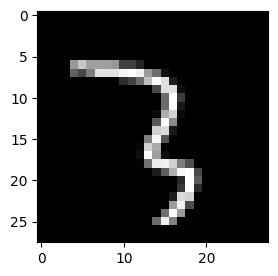

In [27]:
plt.figure(figsize=(3,3))
plt.imshow(images[63].squeeze(),cmap='gray')
plt.show()

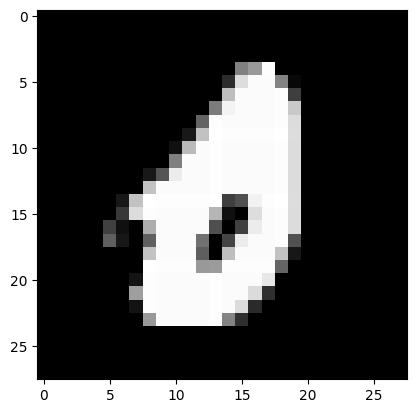

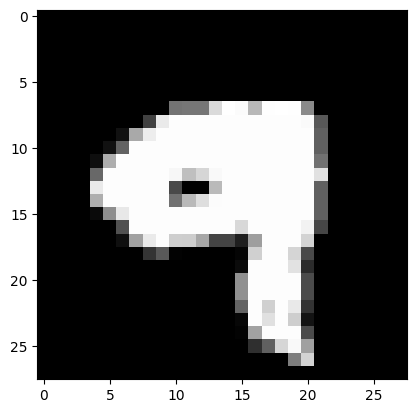

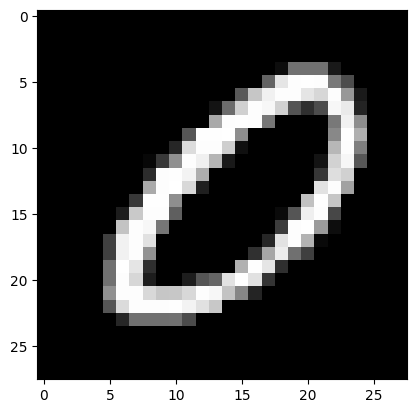

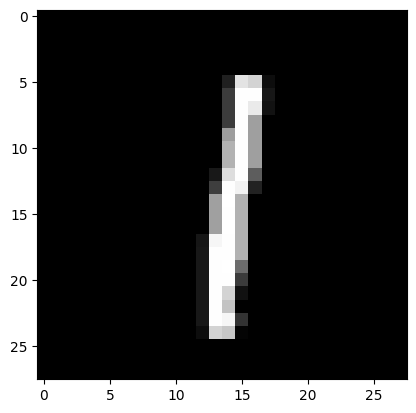

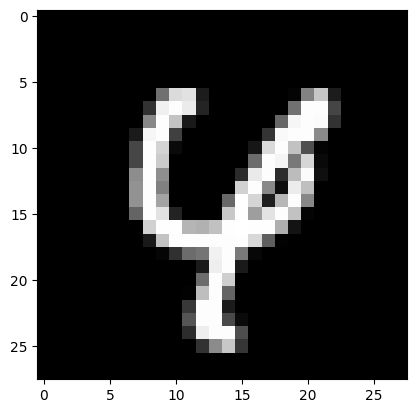

In [39]:
x=0
for i in range(64):
    plt.imshow(images[i].squeeze(),cmap='gray')
    plt.show()
    x+=1
    if x == 5:
        break

In [41]:
labels[6]

tensor(6)

### Training  a fully conected Neural Network

In [43]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,x):
        return self.network(x)

In [45]:
#initializing the model
model=DigitClassifier()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [47]:
#Training the model
epochs = 5

for epoch in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        #forward pass
        outputs=model(images)
        loss=criterion(outputs,labels)
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        #update weights
        optimizer.step()
        running_loss+=loss.item()

    print(f'Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader)}')

Epoch [1/5] Loss: 0.054177694302151545
Epoch [2/5] Loss: 0.05129907126496258
Epoch [3/5] Loss: 0.04734627467756128
Epoch [4/5] Loss: 0.044212234086296986
Epoch [5/5] Loss: 0.040862828968956606


In [51]:
#Testing the model

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuaracy on the test set:{100* correct/total:.2f}%')

Accuaracy on the test set:96.47%


### Classification Report and Confussion Matrix

In [56]:
model.eval()

all_predicted=[]
all_labels=[]

with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)

        #Append labels and predictions
        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())
        

In [57]:
from sklearn.metrics import classification_report

report=classification_report(all_predicted,all_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       986
           1       0.99      0.99      0.99      1134
           2       0.98      0.97      0.98      1045
           3       0.98      0.92      0.95      1073
           4       0.90      0.98      0.94       896
           5       0.96      0.99      0.97       867
           6       0.97      0.99      0.98       940
           7       0.97      0.97      0.97      1023
           8       0.92      0.99      0.96       904
           9       0.99      0.88      0.93      1132

    accuracy                           0.96     10000
   macro avg       0.96      0.97      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(all_labels,all_predicted)
cm

array([[ 965,    1,    1,    1,    0,    3,    2,    4,    1,    2],
       [   0, 1124,    1,    4,    0,    1,    0,    2,    1,    2],
       [   2,    1, 1014,    5,    1,    0,    1,    6,    0,    2],
       [   1,    0,    6,  992,    0,    0,    0,    4,    0,    7],
       [   0,    1,    4,    0,  882,    0,    2,    8,    0,   85],
       [   5,    1,    0,   20,    0,  854,    4,    1,    2,    5],
       [   8,    3,    3,    0,    8,    3,  930,    0,    2,    1],
       [   0,    2,    8,   12,    0,    0,    0,  993,    1,   12],
       [   3,    1,    7,   34,    3,    5,    1,    3,  897,   20],
       [   2,    0,    1,    5,    2,    1,    0,    2,    0,  996]],
      dtype=int64)

<Axes: >

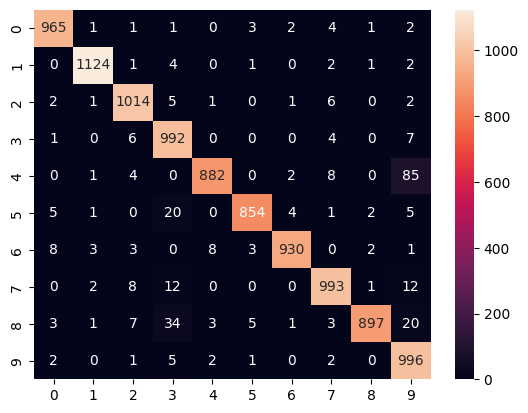

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()